In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
note_table = pd.read_csv("../Utilities/Note_table.tsv", header=0, sep="\t")

## FL

In [5]:
def FL_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    y = y[np.argwhere(y >= 0.001)[0][0]:]

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note", "Piano"])
    notes = list(note_table.iloc[37:72]["Note"])

    for i in tqdm(range(0, 16000*35, 16000), total = 35, leave = False):
        df = df.append(pd.DataFrame({**{"x{}".format(j): [y[j+i]] for j in range(16000)}, 
                                    **{"Note": [notes[int(i/16000)]], "Piano": [file.split(".")[0]]}}))
    return df

In [6]:
def FL_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note", "Piano"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = FL_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [7]:
data = FL_dir_to_data("../Samples/Piano/FL/", 8000, note_table)

## Ivy

In [8]:
note_table[note_table["Note"]=="C#3"]

,Note,Freq
37,C#3,138.591315


In [9]:
note_table.iloc[29+8]

Note        C#3
Freq    138.591
Name: 37, dtype: object

In [10]:
"../Samples/Piano/Ivy_audio/29-PedalOffForte1Ambient.mp3".split("/")[-1].split("-")[0]

'29'

In [11]:
def Ivy_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = note_table.iloc[int(file.split("/")[-1].split("-")[0])+8]["Note"]
    df["Note"] = note
    
    return df

In [12]:
test = Ivy_file_to_data("../Samples/Piano/Ivy_audio/29-PedalOffForte1Ambient.mp3", 8000, note_table)

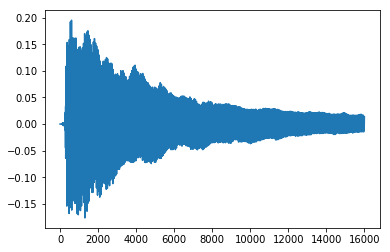

In [13]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [14]:
def Ivy_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = Ivy_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Ivy"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes about 40 min

In [15]:
data_ivy = Ivy_dir_to_data("../Samples/Piano/Ivy_audio/", 8000, note_table)

In [16]:
data_ivy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Note,Piano
0,0.000010,0.000016,0.000015,0.000041,0.000048,0.000044,0.000048,0.000044,0.000054,0.000078,...,-0.006035,-0.003293,0.001875,0.004712,0.005227,0.008205,0.011982,0.013801,C#3,Ivy
1,-0.000050,-0.000042,0.000023,0.000034,0.000101,0.000057,0.000065,0.000072,0.000073,0.000102,...,0.011403,0.017056,0.017290,0.015712,0.015505,0.011613,0.012289,0.011390,C#3,Ivy
2,0.000018,0.000033,0.000029,0.000032,0.000029,0.000051,0.000072,0.000078,0.000089,0.000100,...,0.009590,0.008375,0.007070,0.003943,0.002195,0.002724,0.000688,-0.003558,C#3,Ivy
3,0.000725,0.002514,0.003072,0.002683,0.001682,0.000231,-0.001103,-0.001602,-0.000866,0.000914,...,0.009279,0.009543,0.008122,0.004733,0.001924,-0.000192,0.003165,0.009916,C#3,Ivy
4,-0.000027,-0.000051,-0.000040,-0.000032,-0.000046,-0.000062,-0.000058,-0.000034,-0.000034,-0.000062,...,-0.001590,-0.001646,-0.001592,-0.001760,-0.001824,-0.001481,-0.001105,-0.000834,C#3,Ivy


In [17]:
data_ivy.shape

(1400, 16002)

In [18]:
data = data.append(data_ivy)

In [19]:
data.shape

(2100, 16002)

In [20]:
data.to_pickle("data-FL-Ivy.pkl")

In [21]:
data.to_csv("data-FL-Ivy.tsv", sep="\t", index=False)

##  Estate Grand LE

In [22]:
data = pd.read_pickle("data-FL-Ivy.pkl")

In [23]:
"PDL DWN IN-A#3_0001.mp3".split("-")[1].split("_")[0]

'A#3'

Notes are an octave up here...

In [24]:
def estateLE_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("-")[1].split("_")[0].split(".")[0]
    note = note[:-1] + str(int(note[-1])+1)
    df["Note"] = note
    
    return df

In [25]:
test = estateLE_file_to_data("../Samples/Piano/Estate_Grand_LE/PDL DWN IN-A#2-A#2.mp3", 8000, note_table)

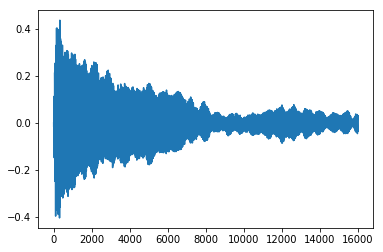

In [26]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [27]:
def estateLE_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = estateLE_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
      
    data["Piano"] = "EstateLE"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 6 min

In [28]:
data_estateLE = estateLE_dir_to_data("../Samples/Piano/Estate_Grand_LE/", 8000, note_table)

In [29]:
data = data.append(data_estateLE)

In [30]:
data["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [31]:
data.to_pickle("data-piano-large.pkl")

In [32]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## City Piano

In [33]:
data = pd.read_pickle("data-piano-large.pkl")

In [34]:
"../Samples/Piano/City_piano/A#3-1-48.mp3".split("/")[-1].split("-")[0]

'A#3'

In [35]:
def city_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("-")[0]
    df["Note"] = note
    
    return df

In [36]:
test = city_file_to_data("../Samples/Piano/City_piano/A#3-1-48.mp3", 8000, note_table)

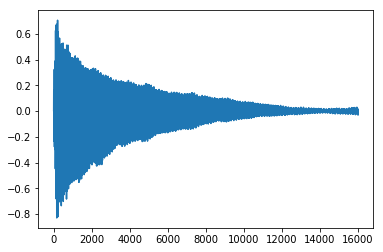

In [37]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [38]:
def city_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = city_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "City"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 3 min

In [39]:
data_city = city_dir_to_data("../Samples/Piano/City_piano/", 8000, note_table)

In [40]:
data = data.append(data_city)

In [41]:
data["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [42]:
data.shape

(2462, 16002)

In [43]:
data.to_pickle("data-piano-large.pkl")

In [44]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Iowa

In [45]:
data = pd.read_pickle("data-piano-large.pkl")

Here the "b" instead of "#" notation is used

In [46]:
def iowa_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("-")[0]
    note = librosa.hz_to_note(librosa.note_to_hz(note))
    df["Note"] = note
    
    return df

In [47]:
test = city_file_to_data("../Samples/Piano/Iowa_piano/A3-1-48.mp3", 8000, note_table)

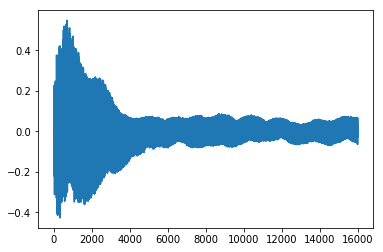

In [48]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [49]:
def iowa_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = iowa_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Iowa"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 2 min

In [50]:
data_iowa = iowa_dir_to_data("../Samples/Piano/Iowa_piano/", 8000, note_table)

In [51]:
data_iowa["Note"].unique()

array(['A3', 'A4', 'A5', 'G#3', 'G#4', 'G#5', 'B3', 'B4', 'B5', 'A#3',
       'A#4', 'A#5', 'C4', 'C5', 'D3', 'D4', 'D5', 'C#3', 'C#4', 'C#5',
       'E3', 'E4', 'E5', 'D#3', 'D#4', 'D#5', 'F3', 'F4', 'F5', 'G3',
       'G4', 'G5', 'F#3', 'F#4', 'F#5'], dtype=object)

In [52]:
data = data.append(data_iowa)

In [53]:
data.shape

(2565, 16002)

In [54]:
data.to_pickle("data-piano-large.pkl")

In [55]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Kawai

In [56]:
data = pd.read_pickle("data-piano-large.pkl")

In [57]:
def kawai_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
    note = file.split("/")[-1].split("v")[0]
    df["Note"] = note
    
    return df

In [58]:
test = kawai_file_to_data("../Samples/Piano/Kawai_upright_piano/A3vH.mp3", 8000, note_table)

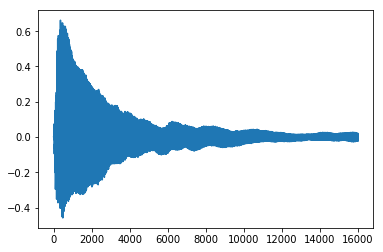

In [59]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [60]:
def kawai_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = kawai_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Kawai"
    data = data.reset_index().drop("index", axis=1)
    return data

In [61]:
data_kawai = kawai_dir_to_data("../Samples/Piano/Kawai_upright_piano/", 8000, note_table)

In [62]:
data_kawai["Note"].unique()

array(['A3', 'A4', 'A5', 'B3', 'B4', 'B5', 'C5', 'D#3', 'D#4', 'D#5',
       'F#3', 'F#4'], dtype=object)

In [63]:
data = data.append(data_kawai)

In [64]:
data.to_pickle("data-piano-large.pkl")

In [65]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Salamander

In [66]:
data = pd.read_pickle("data-piano-large.pkl")

In [67]:
test = kawai_file_to_data("../Samples/Piano/Salamander/A3v1.mp3", 8000, note_table)

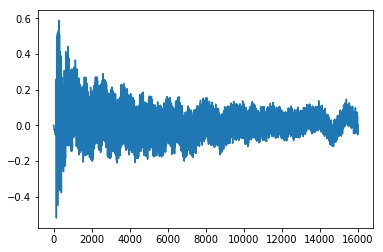

In [68]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

We can use the kawai function

In [69]:
data_salamander = kawai_dir_to_data("../Samples/Piano/Kawai_upright_piano/", 8000, note_table)

In [70]:
data_salamander["Piano"] = "Salamander"

In [71]:
data_salamander["Note"].unique()

array(['A3', 'A4', 'A5', 'B3', 'B4', 'B5', 'C5', 'D#3', 'D#4', 'D#5',
       'F#3', 'F#4'], dtype=object)

In [72]:
data = data.append(data_salamander)

In [73]:
data.shape

(2605, 16002)

In [74]:
data.to_pickle("data-piano-large.pkl")

In [75]:
data.to_csv("data-piano-large.tsv", sep="\t", index=False)

## Baldwin

In [76]:
data = pd.read_pickle("data-piano-large.pkl")

Notes are an octave up

In [77]:
note = "../Samples/Piano/Baldwin/Colour_Piano_Down37_a2.mp3".split("/")[-1].split("_")[-1].split(".")[0]
note = note[:-1] + str(int(note[-1])+1)
note.upper()

'A3'

In [78]:
def baldwin_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = file.split("/")[-1].split("_")[-1].split(".")[0]
        note = (note[:-1] + str(int(note[-1])+1)).upper()

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [79]:
test = baldwin_file_to_data("../Samples/Piano/Baldwin/Colour_Piano_Down37_a2.mp3", 8000, note_table)

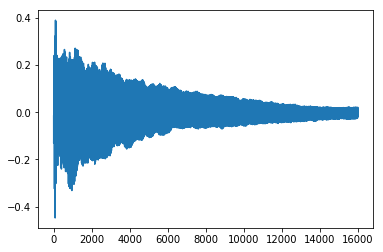

In [80]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [81]:
def baldwin_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = baldwin_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Baldwin"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 7 min

In [82]:
data_baldwin = baldwin_dir_to_data("../Samples/Piano/Baldwin/", 8000, note_table)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [83]:
data_baldwin = data_baldwin.drop(data_baldwin[data_baldwin["Note"].isna()].index)

In [84]:
data_baldwin["Note"].unique()

array(['A3', 'C#3', 'A4', 'C#4', 'F3', 'F4', 'A5', 'C#5', 'F5'],
      dtype=object)

In [85]:
data = data.append(data_baldwin)

In [86]:
data.to_pickle("data-piano-xl.pkl")

In [87]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## A111-A112

In [88]:
"../Samples/Piano/A112-1d-2/0m-042-F#2.mp3".split("/")[-1].split("-")[-1].split(".")[0]

'F#2'

In [89]:
def A112_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = file.split("/")[-1].split("-")[-1].split(".")[0]

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [90]:
test = A112_file_to_data("../Samples/Piano/A112-1d-2/0m-057-A3.mp3", 8000, note_table)

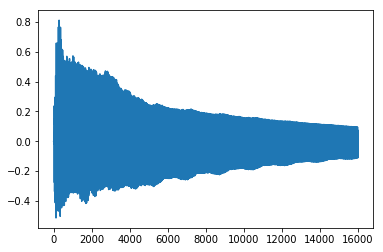

In [91]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [92]:
def A112_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = A112_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "A111-A112"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 4 min

In [93]:
data_A112 = A112_dir_to_data("../Samples/Piano/A112-1d-2/", 8000, note_table)

In [94]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [95]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [96]:
data = data.append(data_A112)

In [97]:
data.to_pickle("data-piano-xl.pkl")

In [98]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 4 min

In [99]:
data_A112 = A112_dir_to_data("../Samples/Piano/A112-1d-1/", 8000, note_table)

In [100]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [101]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [102]:
data = data.append(data_A112)

In [103]:
data.shape

(2927, 16002)

In [104]:
data.to_pickle("data-piano-xl.pkl")

In [105]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 5 min

In [106]:
data_A112 = A112_dir_to_data("../Samples/Piano/A111-1w-1/", 8000, note_table)

In [107]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [108]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [109]:
data = data.append(data_A112)

In [110]:
data.shape

(3004, 16002)

In [111]:
data.to_pickle("data-piano-xl.pkl")

In [112]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 4 min

In [113]:
data_A112 = A112_dir_to_data("../Samples/Piano/A111-1w-2/", 8000, note_table)

In [114]:
data_A112 = data_A112.drop(data_A112[data_A112["Note"].isna()].index)

In [115]:
data_A112["Note"].unique()

array(['D#3', 'F#3', 'A3', 'C4', 'D#4', 'F#4', 'A4', 'C5', 'D#5', 'F#5',
       'A5'], dtype=object)

In [116]:
data = data.append(data_A112)

In [117]:
data.shape

(3081, 16002)

In [118]:
data.to_pickle("data-piano-xl.pkl")

In [119]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Keppy

In [120]:
data = pd.read_pickle("data-piano-xl.pkl")

In [121]:
librosa.note_to_midi("C#3")

49

In [122]:
int("../KEPSREC048.mp3".split("/")[-1].split(".")[0].replace("KEPSREC",""))+1

49

In [123]:
def keppy_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = librosa.midi_to_note(int(file.split("/")[-1].split(".")[0].replace("KEPSREC",""))+1)

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [124]:
test = keppy_file_to_data("../Samples/Piano/Keppy/KEPSREC050.mp3", 8000, note_table)

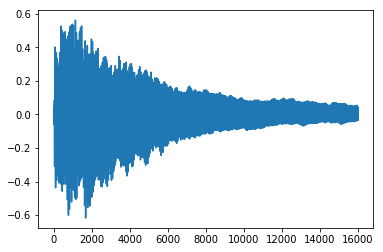

In [125]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [126]:
def keppy_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = keppy_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Keppy"
    data = data.reset_index().drop("index", axis=1)
    return data

Takes around 3 min

In [127]:
data_keppy = keppy_dir_to_data("../Samples/Piano/Keppy/", 8000, note_table)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [128]:
data_keppy = data_keppy.drop(data_keppy[data_keppy["Note"].isna()].index)

In [129]:
data_keppy["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5',
       'G5', 'G#5', 'A5', 'A#5', 'B5'], dtype=object)

In [130]:
data = data.append(data_keppy)

In [131]:
data.shape

(3116, 16002)

In [132]:
data.to_pickle("data-piano-xl.pkl")

In [133]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Basilica 

In [134]:
int("../F_Sustain-15.mp3".split("/")[-1].split("-")[-1].split(".")[0])+34

49

In [135]:
def basilica_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = librosa.midi_to_note(int(file.split("/")[-1].split("-")[-1].split(".")[0])+34)

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [136]:
test = basilica_file_to_data("../Samples/Piano/Basilica_Grand/FF-18.mp3", 8000, note_table)

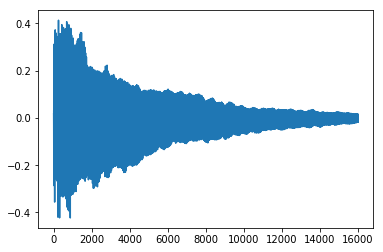

In [137]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [138]:
def basilica_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = basilica_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Basilica"
    data = data.reset_index().drop("index", axis=1)
    data = data.drop(data[data["Note"].isna()].index)
    return data

Takes around 10 min

In [139]:
data_basilica_grand = basilica_dir_to_data("../Samples/Piano/Basilica_Grand/", 8000, note_table)

In [140]:
data_basilica_grand["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A#3', 'B3',
       'C4', 'C#4', 'D4', 'D#4', 'E4'], dtype=object)

In [141]:
data = data.append(data_basilica_grand)

In [142]:
data.shape

(3311, 16002)

In [143]:
data.to_pickle("data-piano-xl.pkl")

In [144]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

Takes around 10 min

In [145]:
data_basilica_upright = basilica_dir_to_data("../Samples/Piano/Basilica_Upright/", 8000, note_table)

In [146]:
data_basilica_upright["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'B3',
       'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4',
       'A#4'], dtype=object)

In [147]:
data = data.append(data_basilica_upright)

In [148]:
data.shape

(3572, 16002)

In [149]:
data.to_pickle("data-piano-xl.pkl")

In [150]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)

## Binaural

In [151]:
int("../AccSus-12.mp3".split("/")[-1].split("-")[-1].split(".")[0])+37

49

In [152]:
def binaural_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    
    if y.shape[0] >= 16000:
        df = pd.DataFrame({"x{}".format(j): [y[j]] for j in range(16000)})
        note = librosa.midi_to_note(int(file.split("/")[-1].split("-")[-1].split(".")[0])+37)

        notes = list(note_table["Note"][37:72])

        if note in notes:
            df["Note"] = note

        return df

In [153]:
test = binaural_file_to_data("../Samples/Piano/Binaural/AccSus-15.mp3", 8000, note_table)

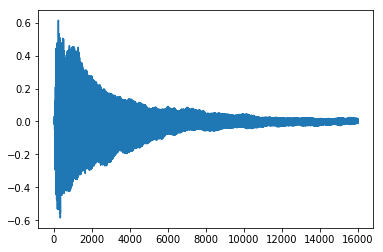

In [154]:
plt.plot(test.drop("Note", axis=1).iloc[0].values)

In [155]:
def binaural_dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = binaural_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data["Piano"] = "Binaural"
    data = data.reset_index().drop("index", axis=1)
    data = data.drop(data[data["Note"].isna()].index)
    return data

Takes around 5 min

In [156]:
data_binaural = binaural_dir_to_data("../Samples/Piano/Binaural/", 8000, note_table)

In [157]:
data_binaural["Note"].unique()

array(['C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3',
       'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4',
       'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5'], dtype=object)

In [158]:
data = data.append(data_binaural)

In [4]:
data = pd.read_pickle("data-piano-xl.pkl")

In [5]:
data.shape

(3690, 16002)

In [6]:
data = data.reset_index(drop=True)

In [7]:
data.index

RangeIndex(start=0, stop=3690, step=1)

In [8]:
data[data["Piano"] == ""]

,Note,Piano,x0,x1,x10,x100,x1000,x10000,x10001,x10002,...,x9990,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999
0,C#3,,0.001465,0.001681,-0.003332,-0.085601,0.027263,-0.017232,-0.017911,-0.015474,...,-0.057110,-0.053847,-0.055972,-0.063948,-0.070374,-0.071525,-0.063825,-0.053222,-0.040445,-0.025969
1,D3,,-0.008995,-0.013210,-0.001074,0.030163,0.011829,-0.037716,-0.041193,-0.036609,...,0.023882,0.015125,0.006958,-0.000051,-0.006389,-0.012335,-0.015986,-0.014184,-0.016138,-0.026822
2,D#3,,-0.009459,-0.008396,0.000469,-0.074676,-0.072720,-0.018720,-0.029227,-0.034730,...,-0.020182,-0.020823,-0.026093,-0.027968,-0.028771,-0.027233,-0.026755,-0.027093,-0.021920,-0.015127
3,E3,,0.009730,0.016409,0.019059,-0.009557,-0.049355,-0.015189,-0.015596,-0.009794,...,0.016486,0.012219,0.008654,0.010368,0.011409,0.008565,0.006487,0.004673,-0.000184,-0.008019
4,F3,,-0.016608,-0.018866,-0.008605,-0.076572,-0.018510,0.000989,-0.002783,-0.006584,...,0.032499,0.027350,0.026474,0.028012,0.025396,0.018985,0.013855,0.008943,0.004273,0.002611
5,F#3,,-0.008436,-0.007619,-0.007377,-0.009701,0.023271,0.005038,0.010505,0.009393,...,-0.016079,-0.014822,-0.005416,0.001201,0.000741,-0.003166,-0.004928,-0.004797,-0.005645,-0.003028
6,G3,,0.013239,0.015854,0.021802,-0.068972,-0.077696,-0.025511,-0.016501,-0.008872,...,-0.038085,-0.042781,-0.047658,-0.050627,-0.045159,-0.038813,-0.038588,-0.034201,-0.031849,-0.032784
7,G#3,,0.009295,0.013564,0.016822,-0.100063,0.072344,-0.001624,-0.006659,-0.008479,...,0.009683,0.012426,0.013523,0.010411,0.011525,0.010081,0.010020,0.010758,0.008308,0.006031
8,A3,,0.005631,0.006369,-0.006200,-0.044597,0.078689,-0.008436,-0.013056,-0.012430,...,0.013361,0.013583,0.006056,0.004613,0.004174,0.002860,0.001550,0.002629,0.002566,-0.003975
9,A#3,,0.001156,0.000137,-0.006675,-0.005024,-0.076027,0.009098,0.009041,0.012218,...,-0.010935,-0.016810,-0.016493,-0.009147,-0.003586,-0.002326,-0.003705,-0.001640,0.002187,0.009513


In [9]:
data.iloc[:700]["Piano"] = "FL"

e:\anaconda\envs\tfm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
data["Piano"].unique()

array(['FL', 'Ivy', 'EstateLE', 'City', 'Iowa', 'Kawai', 'Salamander',
       'Baldwin', 'A111-A112', 'Keppy', 'Basilica', 'Binaural'],
      dtype=object)

In [12]:
data.to_pickle("data-piano-xl.pkl")

In [13]:
data.to_csv("data-piano-xl.tsv", sep="\t", index=False)